findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not

findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.
findfont: Font family 'Karla' not found.


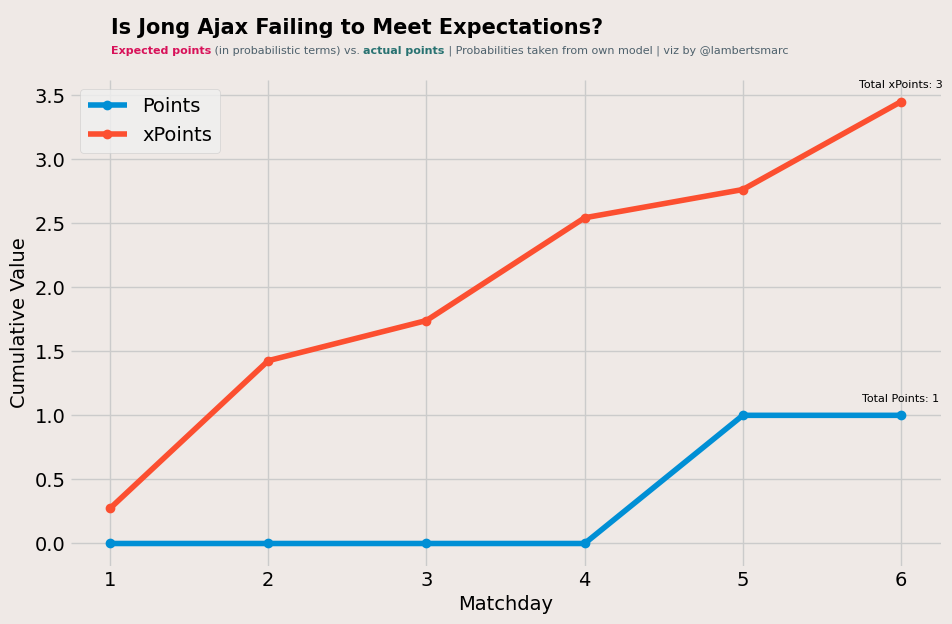

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from PIL import Image
import urllib.request

# Step 2: Read the Excel file into a pandas DataFrame
df = pd.read_excel('/Users/marclambertes/AFC Ajax II_Points_Per_Date_with_Cumulative.xlsx')

# Define custom text styles
custom_text_styles = {
    'font': 'DM Sans',  # Your custom font here
    'weight': 'bold',   # Your custom weight here
    'size': '7',        # Your custom size here
    'color': 'grey',    # Your custom color here
}

def ax_text(x, y, s, ax, ha='left', va='center', fontsize=9, annotationbbox_kw=None):
    ax.annotate(s, xy=(x, y), xytext=(0, 0), textcoords='axes fraction', ha=ha, va=va,
                fontsize=fontsize, **custom_text_styles, annotationbbox=annotationbbox_kw)

# Step 3: Calculate the cumulative sums
df['Cumulative Points'] = df['Points'].cumsum()
df['Cumulative xPoints'] = df['ExpectedPoints'].cumsum()

# Step 4: Create the line graph
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor("#EFE9E6")  # Set the background color of the entire figure
ax.set_facecolor("#EFE9E6")   # Set the background color of the axes

plt.plot(df['Matchday'], df['Cumulative Points'], label='Points', marker='o')
plt.plot(df['Matchday'], df['Cumulative xPoints'], label='xPoints', marker='o')

# Remove axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Annotate the end points with cumulative totals
end_point = len(df)
end_cumulative_points = df['Cumulative Points'].iloc[end_point - 1]
end_cumulative_xPoints = df['Cumulative xPoints'].iloc[end_point - 1]

plt.annotate(f'Total Points: {end_cumulative_points:.0f}', (end_point, end_cumulative_points), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')
plt.annotate(f'Total xPoints: {end_cumulative_xPoints:.0f}', (end_point, end_cumulative_xPoints), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('Matchday')
plt.ylabel('Cumulative Value')
plt.legend()
plt.grid(True)
fig_text(
    x=0.12, y=.95, 
    s='Is Jong Ajax Failing to Meet Expectations?',
    va='bottom', ha='left',
    fontsize=15, color='black', font='DM Sans', weight='bold'
)
fig_text(
	x=0.12, y=.92, 
    s='<Expected points> (in probabilistic terms) vs. <actual points> | Probabilities taken from own model | viz by @lambertsmarc',
    highlight_textprops=[{'weight':'bold', 'color': '#D81159'}, {'weight':'bold', 'color': '#287271'}],
	va='bottom', ha='left',
	fontsize=8, color='#4E616C', font='Karla'
)

plt.savefig(
	"/Users/marclambertes/10032022_underperformers.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.show()
